In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('/content/Dataset of Diabetes .csv')
df1=pd.DataFrame(data)
data=pd.read_csv('/content/adult.csv')
df2=pd.DataFrame(data)

In [5]:
df2.isnull().sum().sum()

0

In [ ]:
df1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
df1['Gender'].replace(to_replace='f',value='F',inplace=True)

<ipython-input-6-0bc6733c642e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace(to_replace='f',value='F',inplace=True)


In [7]:
label_encoder = preprocessing.LabelEncoder()
df1['Gender']= label_encoder.fit_transform(df1['Gender'])
print(df1.head())

    ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [8]:
df1['CLASS'].replace(to_replace='N ',value='N',inplace=True)
df1['CLASS'].replace(to_replace='Y ',value='Y',inplace=True)
df1['CLASS']=label_encoder.fit_transform(df1['CLASS'])
print(df1['CLASS'].unique())

[0 1 2]


<ipython-input-8-06c2231ea086>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['CLASS'].replace(to_replace='N ',value='N',inplace=True)
<ipython-input-8-06c2231ea086>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

<Axes: ylabel='AGE'>

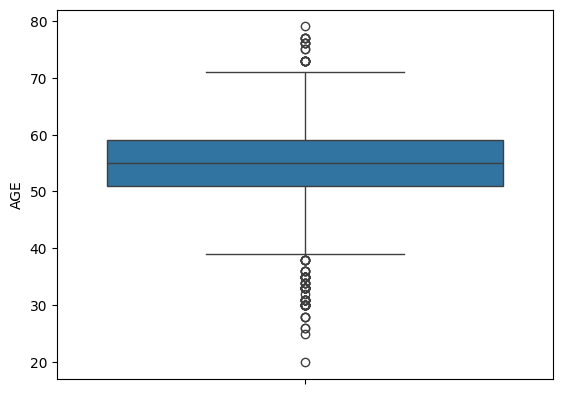

In [9]:
import seaborn as sns
sns.boxplot(df1['AGE'])

In [11]:
p75=df1['AGE'].quantile(0.75)
p25=df1['AGE'].quantile(0.25)
IQR=p75-p25
lower=p25-(1.5*IQR)
upper=p75+(1.5*IQR)
upper_array = np.where(df1['AGE'] >= upper)[0]
lower_array = np.where(df1['AGE'] <= lower)[0]

# Removing the outliers
df1.drop(index=upper_array, inplace=True)
df1.drop(index=lower_array, inplace=True)

<Axes: ylabel='AGE'>

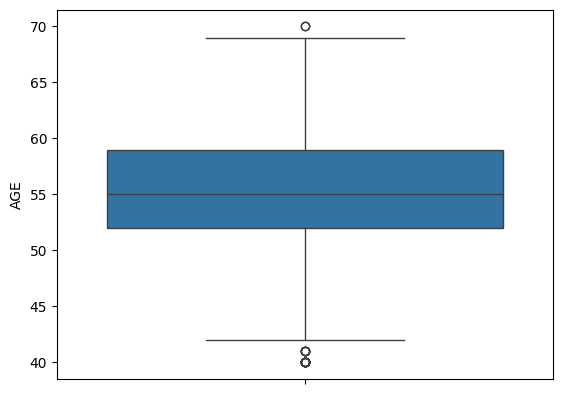

In [12]:
import seaborn as sns
sns.boxplot(df1['AGE'])

In [13]:
scaler = MinMaxScaler()
df1[['AGE']]=scaler.fit_transform(df1[['AGE']])
df1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,0.333333,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
2,420,47975,0,0.333333,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,0.333333,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
5,634,34224,0,0.166667,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,721,34225,0,0.333333,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [14]:
scaler = MinMaxScaler()
df1[['Urea']]=scaler.fit_transform(df1[['Urea']])
df1[['Cr']]=scaler.fit_transform(df1[['Cr']])
df1[['HbA1c']]=scaler.fit_transform(df1[['HbA1c']])
df1[['Chol']]=scaler.fit_transform(df1[['Chol']])
df1[['TG']]=scaler.fit_transform(df1[['TG']])
df1[['HDL']]=scaler.fit_transform(df1[['HDL']])
df1[['LDL']]=scaler.fit_transform(df1[['LDL']])
df1[['VLDL']]=scaler.fit_transform(df1[['VLDL']])
df1[['BMI']]=scaler.fit_transform(df1[['BMI']])
df1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,0.333333,0.109375,0.033333,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0
2,420,47975,0,0.333333,0.109375,0.033333,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0
3,680,87656,0,0.333333,0.109375,0.033333,0.264901,0.377551,0.044444,0.226804,0.144737,0.011461,0.173913,0
5,634,34224,0,0.166667,0.046875,0.005128,0.205298,0.244898,0.051852,0.082474,0.157895,0.008596,0.069565,0
6,721,34225,0,0.333333,0.039062,0.038462,0.205298,0.316327,0.074074,0.072165,0.236842,0.014327,0.173913,0


In [15]:
missing=np.where(df2['workclass']=='?')[0]
df2.drop(index=missing,inplace=True)
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [24]:
missing=np.where(df2['occupation']=='?')[0]
df2.drop(index=missing,inplace=True)

In [27]:
df2.replace('?', np.nan, inplace=True)
df2.fillna(df2.mode().iloc[0], inplace=True)


In [28]:
for i in df2.columns:
  print(i,df2[i].unique())

age [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 40 45 22 23 54 32 46 56 17
 29 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]
workclass ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [226802  89814 336951 ... 252208 255835 257302]
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
educational-num [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'


In [29]:
education_order = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, '10th': 6,
    '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12,
    'Bachelors': 13, 'Masters': 14, 'Prof-school': 15, 'Doctorate': 16
}
df2['education'] = df2['education'].map(education_order)


In [31]:
df2 = pd.get_dummies(df2, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], drop_first=True)


In [32]:
df2['income'] = df2['income'].map({'<=50K': 0, '>50K': 1})


In [33]:
df2[['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(df2[['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [34]:
df2.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,0.144430,7,7,0.000000,0.0,0.397959,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,0.051677,9,9,0.000000,0.0,0.500000,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,0.219011,12,12,0.000000,0.0,0.397959,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,0.099418,10,10,0.076881,0.0,0.397959,1,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,0.125398,6,6,0.000000,0.0,0.295918,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [35]:
scaler = MinMaxScaler()
df2[['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(df2[['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']])


In [38]:
df2[['age']] = scaler.fit_transform(df2[['age']])

In [39]:
df2.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.144430,7,7,0.000000,0.0,0.397959,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.287671,0.051677,9,9,0.000000,0.0,0.500000,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.150685,0.219011,12,12,0.000000,0.0,0.397959,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0.369863,0.099418,10,10,0.076881,0.0,0.397959,1,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.232877,0.125398,6,6,0.000000,0.0,0.295918,0,False,False,...,False,False,False,False,False,False,False,True,False,False
